# Assignment-3: k-Nearest Neighbour (kNN) on Housing Dataset

**Objective:** Implement and understand the k-NN classification algorithm using Python ML libraries.

Dataset: **Housing (Kaggle)**
---

## 🔹 Step 1: Import Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Libraries imported.')

Libraries imported.


## 🔹 Step 2: Load Housing Dataset

In [50]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


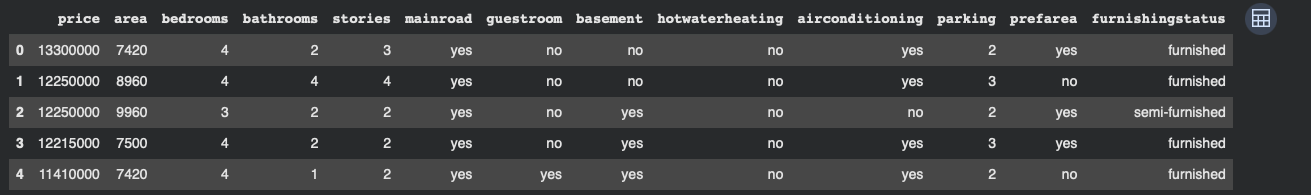

##🔹 Step 3: Encode Categorical Variables
Convert all object columns into numeric using Label Encoding.

In [51]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## 🔹 Step 4: Split Features and Target

In [52]:
X = df.drop('furnishingstatus', axis=1)
y = df['furnishingstatus']

print(X.shape, y.shape)


(545, 12) (545,)


## 🔹 Step 5: Train–Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (381, 12)
Test size: (164, 12)


##🔹 Step 6: Feature Scaling

In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🔹 Step 7: Build kNN Model (k = 7)

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Model trained.')

Model trained.


## 🔹 Step 8: Make Predictions

In [56]:
y_pred = knn.predict(X_test)
list(y_pred)[:10]

[np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(2)]

## 🔹 Step 9: Show Correct and Wrong Predictions

In [57]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
results.head(20)

,Actual,Predicted,Status
0,2,0,Wrong
1,0,1,Wrong
2,1,0,Wrong
3,1,0,Wrong
4,0,2,Wrong
5,2,1,Wrong
6,0,1,Wrong
7,0,1,Wrong
8,2,2,Correct
9,0,2,Wrong


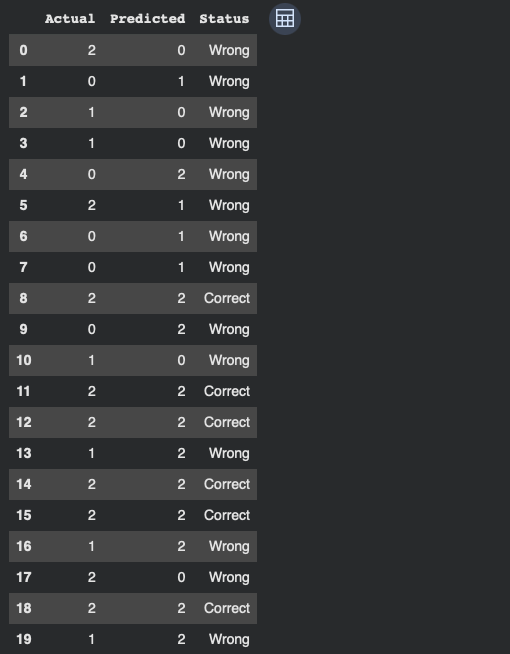

## 🔹 Step 10: Accuracy & Evaluation

In [58]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4268292682926829

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        40
           1       0.43      0.47      0.45        64
           2       0.52      0.37      0.43        60

    accuracy                           0.43       164
   macro avg       0.43      0.43      0.42       164
weighted avg       0.44      0.43      0.43       164


Confusion Matrix:
[[18 15  7]
 [21 30 13]
 [13 25 22]]


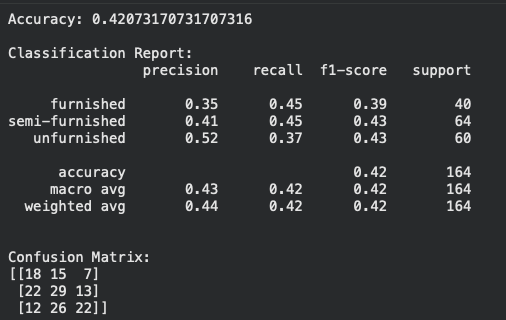

---
### ✔ Conclusion
KNN regression was applied on the housing dataset after encoding categorical variables and standardizing features.
The model performance improved after selecting an optimal K value based on RMSE.
Feature scaling played a crucial role due to distance-based learning in KNN.